# Creation of high-dimensional datasets in order to analyze the performance of the ID estimation algorithms such as TwoNN, MLE, FastDANCo e MiND_ML

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline
path = 'E:/stima ID ad alta dimensionalità/'

## Import TwoNN e MLE

In [2]:
# import TwoNN di A. Laio
import Two_NN 
T = Two_NN.TwoNN(discard=0.1,block_analysis=False)

# import MLE di Levina e Bickel
from geomle import mle

## Generation of a matrix (NxD) with elements generated according to a uniform distribution. The study is repeated for numberOFiteration times in order to evaluate mean and dev.st

In [4]:
N = 100
dimensions_list = [1,5,10,30,50,100,150,250,500,1000,2500,5000,10000,15000,25000,50000,100000,150000,200000,300000,500000]

numberOFiteration = 30
numberOFtest = len(dimensions_list)

TNN_ID_temp = np.zeros(numberOFiteration)         # where to save the IDs estimated by TwoNN
MLE_ID_temp = np.zeros(numberOFiteration)         # where to save the IDs estimated by MLE

TNN_mean_ID = np.zeros(numberOFtest)         # where to save the average IDs estimated by TwoNN
TNN_std = np.zeros(numberOFtest)           # where to save the estimated dev.st for TwoNN
MLE_mean_ID = np.zeros(numberOFtest)         # where to save the average IDs estimated by MLE
MLE_std = np.zeros(numberOFtest)           # where to save the estimated dev.st for MLE 


for i,D in enumerate(dimensions_list):
    for iteration in range(numberOFiteration):
        data = np.random.uniform(size=(N, D))        # generation of a matrix (NxD) with uniformly distributed elements
        data_matlab = data.transpose()                     # Matlab scripts read matrices (DxN)
        np.savetxt(path + 'Matlab/mat_D'+str(i+1)+'_iter_'+
                   str(iteration+1)+'.txt', data_matlab, delimiter=',')    # saving in .txt to extimate
                                                                         # the ID by FastDANCo and MiND_ML
        TNN_ID_temp[iteration] = (T.fit(data)).DimEstimate_
        MLE_data = pd.DataFrame(data)
        MLE_temp = mle(MLE_data)[0]
        MLE_ID_temp[iteration] = MLE_temp.mean()
        
    TNN_mean_ID[i] = TNN_ID_temp.mean()
    TNN_std[i] = TNN_ID_temp.std()

    MLE_mean_ID[i] = MLE_ID_temp.mean()
    MLE_std[i] = MLE_ID_temp.std()
    

Results = pd.DataFrame()
Results['Number of Parameters'] = dimensions_list
Results['TwoNN'] = TNN_mean_ID
Results['TwoNN std'] = TNN_std
Results['MLE'] = MLE_mean_ID
Results['MLE std'] = MLE_std

Results.to_excel(path + 'stima_ID_ad_alta_D.xlsx')

## Loading the results with the addition of FastDANCo and MiND_ML estimates calculated in Matlab

In [2]:
Results_upd = pd.read_excel(path + 'stima_ID_ad_alta_D.xlsx')

In [3]:
Results_upd.set_index(['Number of Parameters'], inplace=True)

Results_upd['ID'] = Results_upd.index

In [5]:
Results_upd

,TwoNN,TwoNN std,MLE,MLE std,FastDANCo,FastDANCo std,MiND_ML,MiND_ML std,ID
Number of Parameters,,,,,,,,,
1,1.046416,0.165606,0.975220,0.025691,1.000000,0.000000,1.000000,0.000000,1
5,4.448806,0.713809,4.005490,0.131067,4.100000,0.305129,4.100000,0.305129,5
10,8.184712,0.971063,7.035490,0.218684,9.666667,0.479463,7.566667,0.568321,10
30,19.899293,2.635398,15.030646,0.362105,28.966667,1.066200,16.733333,0.739680,30
50,26.863673,2.970340,20.602728,0.587777,47.500000,1.870829,23.166667,0.874281,50
100,40.070864,5.093392,30.850356,0.935108,95.400000,3.420022,35.166667,1.416244,100
150,54.706303,7.749884,38.741578,1.279934,139.900000,6.691992,44.800000,2.310396,150
250,73.543906,9.402386,51.107317,1.369133,194.800000,6.434819,59.500000,2.635958,250
500,106.132747,12.803915,73.728726,2.111934,314.066667,15.341927,86.133333,3.617327,500


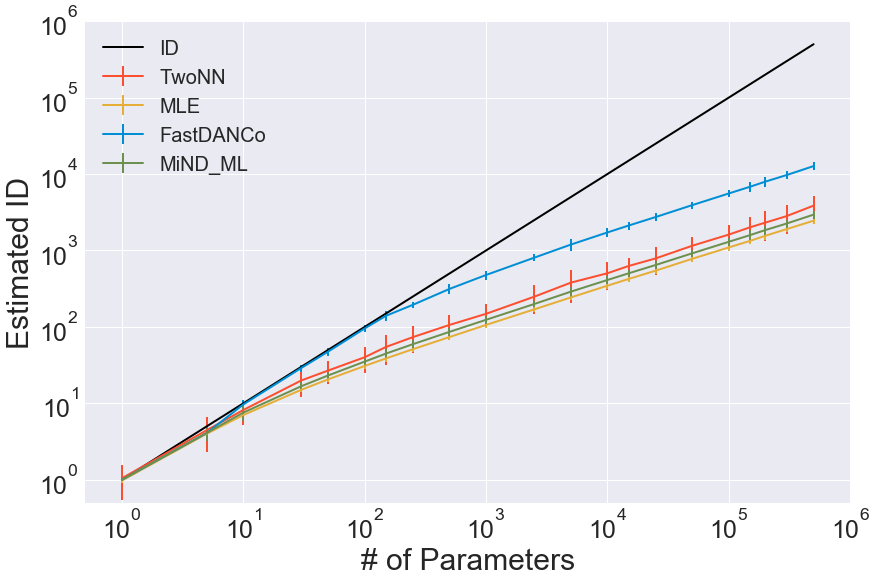

In [10]:
color = ['#fc4f30', '#e5ae38', '#008fd5', '#6d904f']

Results_upd['ID'].plot(figsize=(12,8),color='black',logy=True,logx=True,fontsize=16,lw=2)
Results_upd['TwoNN'].plot(yerr=3*Results_upd['TwoNN std'],color=color[0],lw=2)
Results_upd['MLE'].plot(yerr=3*Results_upd['MLE std'],color=color[1],lw=2)
Results_upd['FastDANCo'].plot(yerr=3*Results_upd['FastDANCo std'],color=color[2],lw=2)
Results_upd['MiND_ML'].plot(yerr=3*Results_upd['MiND_ML std'],color=color[3],lw=2)

plt.xlabel('# of Parameters',fontsize=30)
plt.ylabel('Estimated ID',fontsize=30)

plt.xlim([0.5,1000000])
plt.ylim([0.5,1000000])
plt.tight_layout()
plt.legend(prop={'size': 20})
plt.tick_params(axis='both', which='major', labelsize=25)
#plt.savefig('C:/Users/ftg/OneDrive/Desktop/Articolo/figura1(a).png', bbox_inches="tight",dpi=300)

## Recaling the results proportionally according to the equation:

## $ID_{algo}^{extimated} (\#_{parms} ) = \#_{parms}^{max} \frac{ (ID_{algo}^{extimated} (\#_{parms} )) } { (ID_{algo}^{extimated} ( \#_{parms}^{max}  ) ) }$

In [11]:
Results_rescaled = pd.concat([Results_upd['TwoNN'],Results_upd['MLE'],Results_upd['FastDANCo'],Results_upd['MiND_ML']],axis=1)

In [12]:
max_index = Results_rescaled.index[-1]

for algo in Results_rescaled.keys():
    for index in Results_rescaled.index:
        Results_rescaled[algo][index] = max_index * Results_upd[algo][index] / Results_upd[algo][max_index]

In [9]:
Results_rescaled

,TwoNN,MLE,FastDANCo,MiND_ML
Number of Parameters,,,,
1,135.466899,198.986538,39.335905,169.694776
5,575.933580,817.291125,161.277211,695.748580
10,1059.576571,1435.540695,380.247082,1284.023803
30,2576.122998,3066.894432,1139.430049,2839.559246
50,3477.717745,4203.837392,1868.455489,3931.262303
100,5187.494562,6294.791681,3752.645340,5967.599611
150,7082.169341,7904.938265,5503.093113,7602.325950
250,9520.848070,10428.077658,7662.634299,10096.839152
500,13739.734715,15043.812406,12354.096572,14616.376677


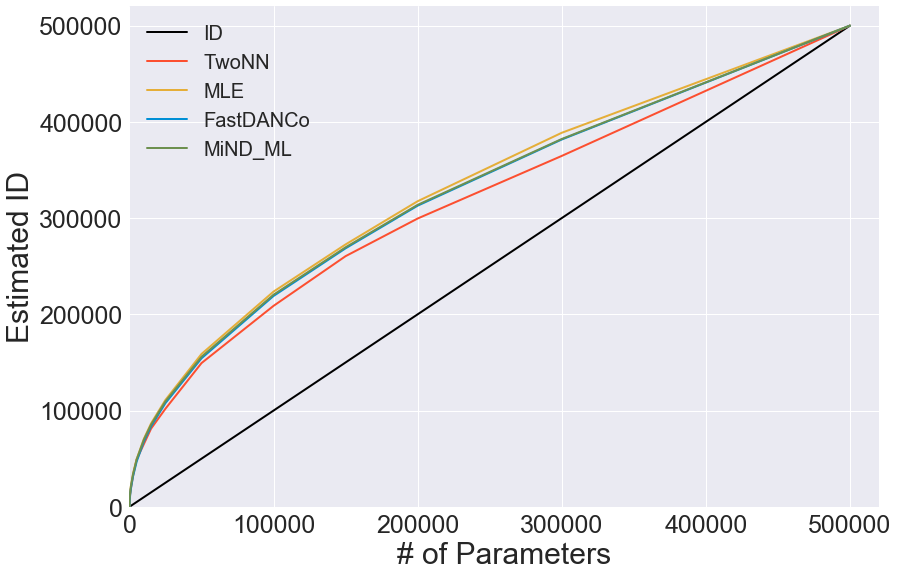

In [13]:
color = ['#fc4f30', '#e5ae38', '#008fd5', '#6d904f']

Results_upd['ID'].plot(figsize=(12,8),color='black',fontsize=16,lw=2)
Results_rescaled['TwoNN'].plot(color=color[0],lw=2)
Results_rescaled['MLE'].plot(color=color[1],lw=2)
Results_rescaled['FastDANCo'].plot(color=color[2],lw=2)
Results_rescaled['MiND_ML'].plot(color=color[3],lw=2)

plt.xlabel('# of Parameters',fontsize=30)
plt.ylabel('Estimated ID',fontsize=30)

plt.xlim([0,520000])
plt.ylim([0,520000])
plt.tight_layout()
plt.legend(prop={'size': 20})
plt.tick_params(axis='both', which='major', labelsize=25)

#plt.savefig('C:/Users/ftg/OneDrive/Desktop/Articolo/figura1(c).png', bbox_inches="tight",dpi=300)

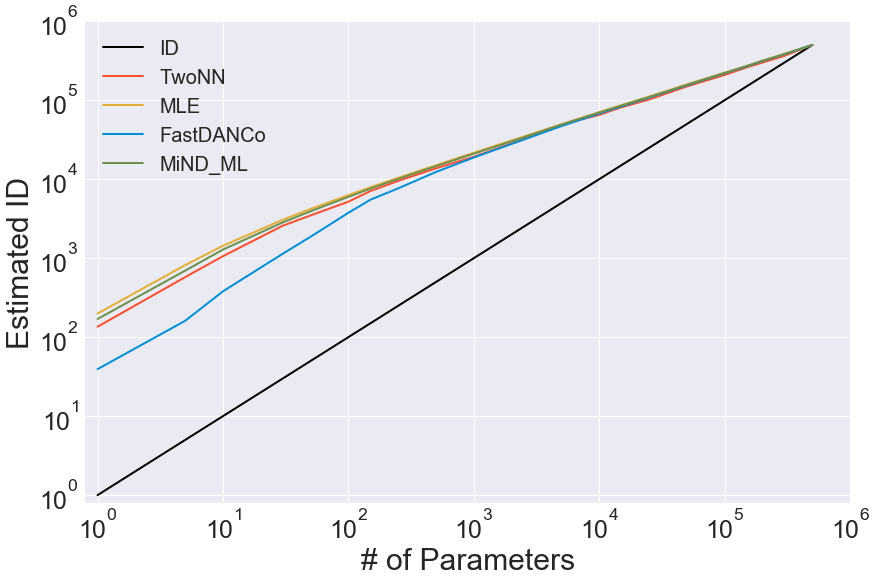

In [14]:
color = ['#fc4f30', '#e5ae38', '#008fd5', '#6d904f']

Results_upd['ID'].plot(figsize=(12,8),color='black',logx=True,logy=True,fontsize=16,lw=2)
Results_rescaled['TwoNN'].plot(color=color[0],lw=2)
Results_rescaled['MLE'].plot(color=color[1],lw=2)
Results_rescaled['FastDANCo'].plot(color=color[2],lw=2)
Results_rescaled['MiND_ML'].plot(color=color[3],lw=2)

plt.xlabel('# of Parameters',fontsize=30)
plt.ylabel('Estimated ID',fontsize=30)

plt.xlim([0.8,1000000])
plt.ylim([0.8,1000000])
plt.tight_layout()
plt.legend(prop={'size': 20})
plt.tick_params(axis='both', which='major', labelsize=25)

#plt.savefig('C:/Users/ftg/OneDrive/Desktop/Articolo/figura1(b).png', bbox_inches="tight",dpi=300)